<a href="https://colab.research.google.com/github/nhattminh160901/do_an_cac_thuat_toan_toi_uu/blob/main/GD_hqttdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/nhattminh160901/Do_An_2022/main/insurance.csv")

In [29]:
df = pd.DataFrame(data)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

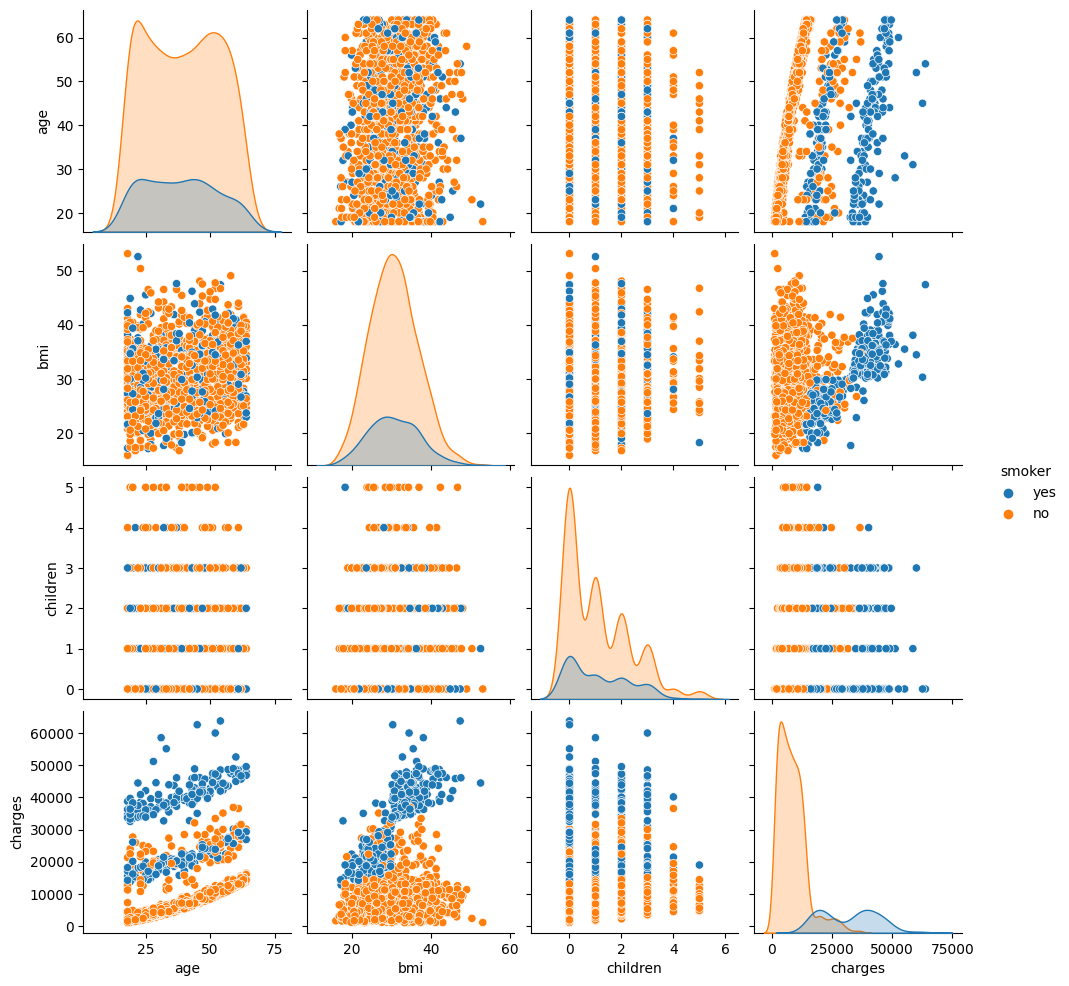

In [32]:
sns.pairplot(df, hue="smoker")
plt.show()

In [33]:
smoker_df = df[df["smoker"] == "yes"]

Text(0, 0.5, 'charges')

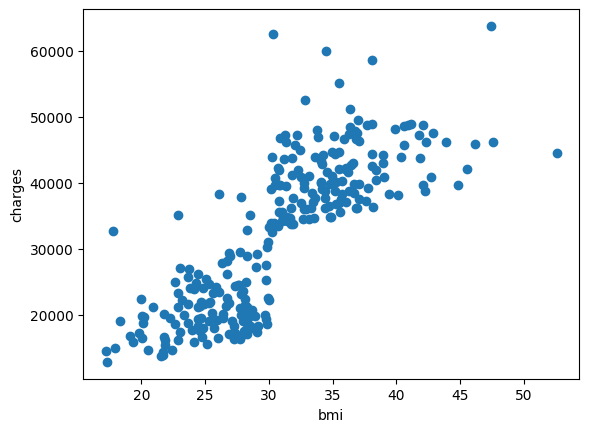

In [34]:
plt.scatter(data=smoker_df, x="bmi", y="charges")
plt.xlabel("bmi")
plt.ylabel("charges")

In [35]:
Q1 = smoker_df["bmi"].quantile(0.25)
Q3 = smoker_df["bmi"].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR

In [36]:
filtered_df = smoker_df[(smoker_df["bmi"] >= lower_threshold) & (smoker_df["bmi"] <= upper_threshold)]
filtered_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


Text(0, 0.5, 'charges (filtered)')

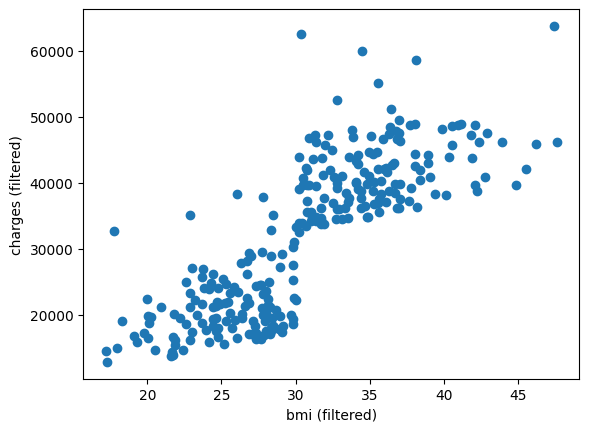

In [37]:
plt.scatter(data=filtered_df, x="bmi", y="charges")
plt.xlabel("bmi (filtered)")
plt.ylabel("charges (filtered)")

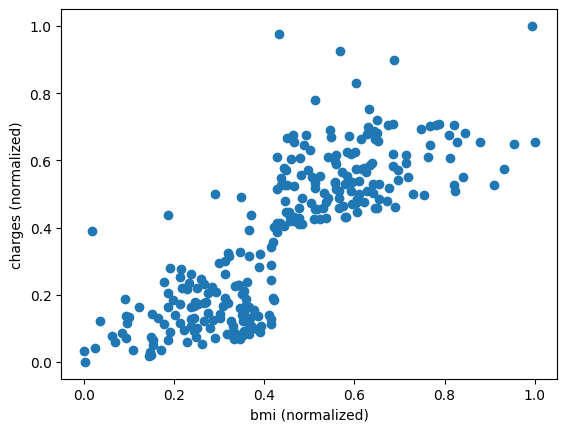

In [38]:
X, y = filtered_df.bmi.values.reshape(-1, 1), filtered_df.charges.values
X = (X-X.min())/(X.max()-X.min())
y = (y-y.min())/(y.max()-y.min())
plt.xlabel("bmi (normalized)")
plt.ylabel("charges (normalized)")
plt.scatter(X, y)

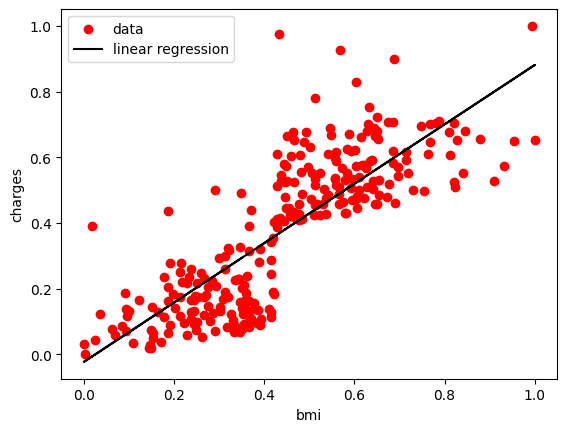

In [39]:
from sklearn import linear_model
model = linear_model.LinearRegression().fit(X, y)
plt.scatter(X, y, color="red", label="data")
plt.plot(X, model.predict(X), label="linear regression", color="black")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()

In [40]:
coefficients = model.coef_
intercept = model.intercept_
print("He so goc: ", coefficients)
print("He so danh chan: ", intercept)

He so goc:  [0.90410662]
He so danh chan:  -0.023026976807843158


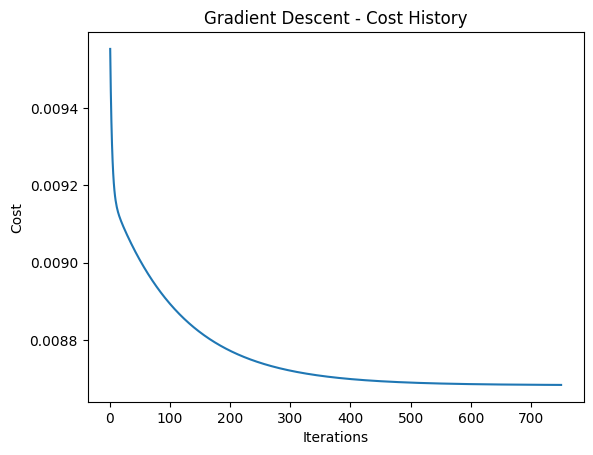

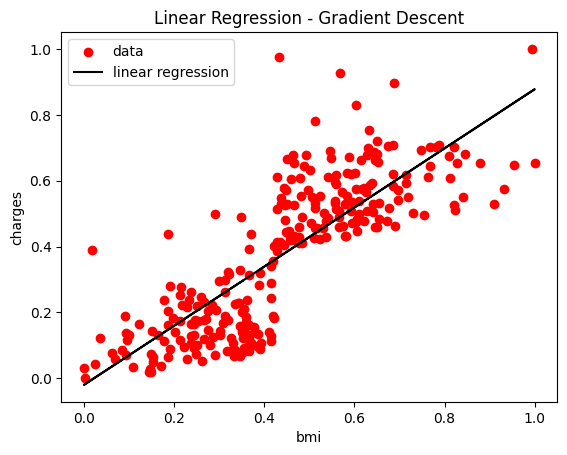

In [44]:
m = len(X)
learning_rate = 0.125

x = np.c_[np.ones(m), X]

theta = np.random.rand(2)

def hypothesis(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

num_iterations = 750
theta_final, cost_history = gradient_descent(x, y, theta, learning_rate, num_iterations)

plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent - Cost History")
plt.show()

plt.scatter(X, y, color="red", label="data")
plt.plot(X, hypothesis(x, theta_final), color="black", label="linear regression")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("Linear Regression - Gradient Descent")
plt.legend()
plt.show()

In [45]:
theta_final

array([-0.02021149,  0.8979529 ])